In [41]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math


In [4]:
df = pd.read_csv("result/term_document_matrix.csv")

In [12]:
df = df.rename(columns={'Unnamed: 0' : 'Token'})


In [13]:
df = df.set_index('Token')

In [43]:
X = StandardScaler().fit_transform(df.values).T

In [44]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

In [45]:
pca.explained_variance_ratio_

array([0.09637413, 0.06520735])

In [46]:
pca.explained_variance_ratio_.sum()

0.16158147105196619

In [47]:
Y.shape

(50, 2)

In [48]:
title = df.columns.to_list()

In [49]:
label = list(map(lambda x : " ".join(x.split()[:2]) + "...", title))
label

['Aloe...',
 'Mwape Miti...',
 'Active Server...',
 'Antidepressant...',
 'Argon...',
 'Antarctic Circumpolar...',
 'Saviour Kasukuwere...',
 'Hudhayfah ibn...',
 'Christmas Island...',
 'Andrew Martinez...',
 'Bromeliales...',
 'Alexander of...',
 'Funny Business...',
 'County Fermanagh...',
 'Trust (1990...',
 'Malaysia Federal...',
 'Carnivora...',
 'Plate appearance...',
 'Charro (Mexican...',
 'Alan Ayckbourn...',
 'Casey at...',
 'Hakkasan...',
 'National Organization...',
 'Simmerath...',
 'Arbeit macht...',
 'Billy Roberts...',
 'Chris Thorburn...',
 'Nula Conwell...',
 'California...',
 'Cigarette tax...',
 'Affidavit...',
 'Little Niangua...',
 'Politics of...',
 'Consciousness...',
 'Pies Descalzos,...',
 'Analysis...',
 'Zhang Sixun...',
 'Bombardier Inc....',
 'Theosophical Society...',
 'Merzenich...',
 'Amputation...',
 'Başmakçı...',
 'Richilde, Countess...',
 'Battle of...',
 'Castelloza...',
 'Antioxidant...',
 'Hassa, Hatay...',
 'Breast reconstruction...',
 'Susan W

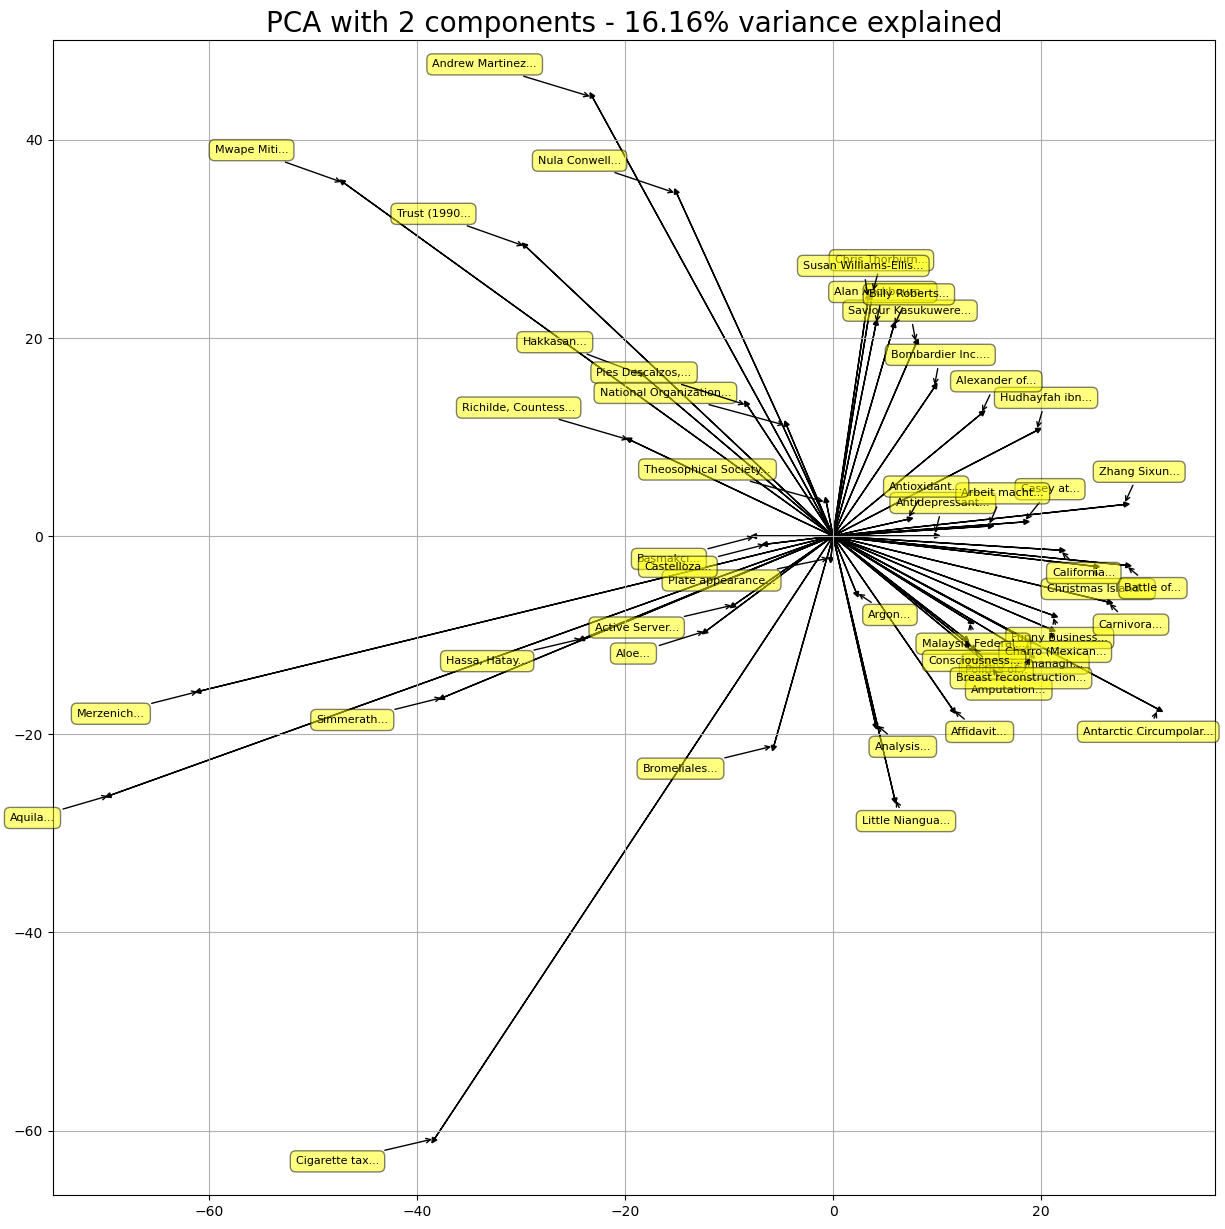

In [50]:
plt.figure(figsize=(15, 15))

for text, x, y in zip(label, Y[:, 0], Y[:, 1]):
    plt.annotate(
        text,
        xy=(x, y), xytext=(math.copysign(40, x), math.copysign(20, y)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        fontsize=8
    )
    plt.arrow(0, 0, x, y, head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.grid()
plt.title(f"PCA with 2 components - {pca.explained_variance_ratio_.sum() * 100:.2f}% variance explained", fontsize=20)
plt.show()